In [1]:
import sys, json
sys.path.append("/visuworks/Blindless_AIFFELTON/Models") 

import check_result_full_size, loss, metrics, preprocess_full_size, data_generator_full_size
import os, random
import tensorflow as tf
import matplotlib.pyplot as plt


MODEL_PATH = '/visuworks/Blindless_AIFFELTON/Models/Dense_Unet/model_parameters/512_40epochs_g_clahe.h5'
HISTORY_PATH = '/visuworks/Blindless_AIFFELTON/Models/Dense_Unet/history/512_40epochs_g_clahe_history.json'
SOURCE = '/visuworks/Dataset/Selected Dataset 2'

2024-01-23 16:44:55.877947: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-23 16:44:55.928892: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 16:44:55.928920: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 16:44:55.930334: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 16:44:55.939129: I tensorflow/core/platform/cpu_feature_guar

2024-01-23 16:41:54.888752: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20763 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9
2024-01-23 16:41:57.953545: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


125/125 [==============================] - 60s 423ms/step - loss: 0.1943 - sensitivity: 0.8486 - specificity: 0.9746 - accuracy: 0.9660
Loss: 0.19425064325332642
Sensitivity: 0.8486236333847046
Specificity: 0.9745769500732422
Accuracy: 0.9659908413887024


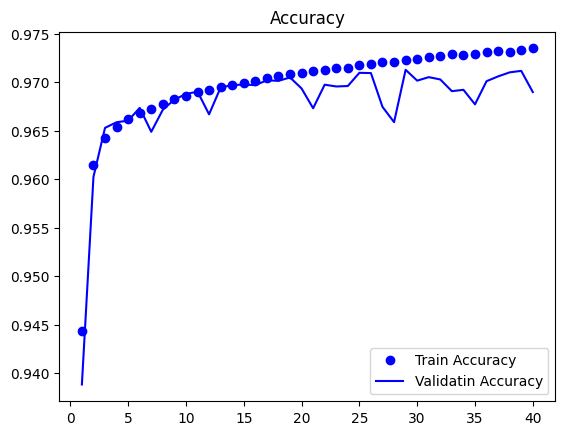

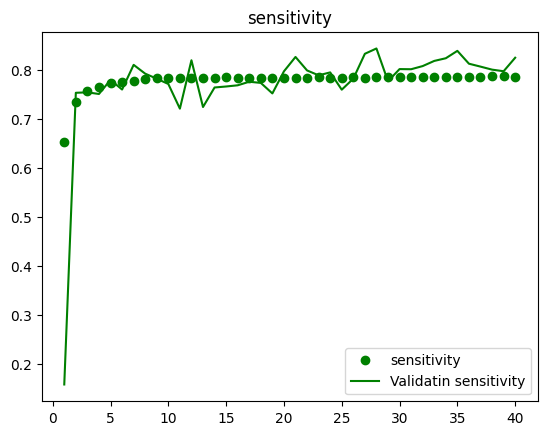

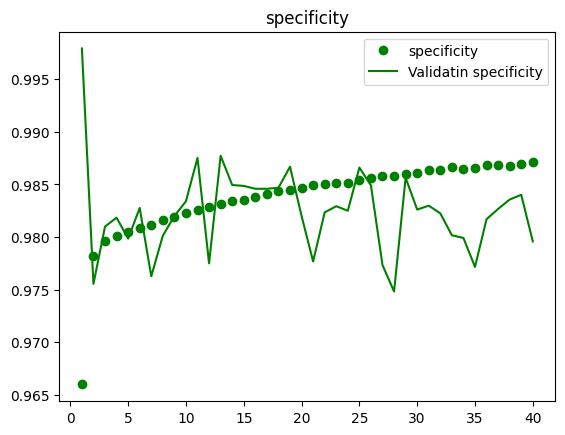

<Figure size 640x480 with 0 Axes>

In [2]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy}

# Load the model with custom_objects parameter
model = tf.keras.models.load_model(MODEL_PATH, custom_objects=custom_objects)
test_preproc = preprocess_full_size.build_augmentation(is_train=False)
test_generator = data_generator_full_size.FullSizedDataGenerator(
    data_generator_full_size.SOURCE, 
    augmentation=test_preproc,
    is_train=False
)
metrics.print_evaluation(model, test_generator)

# Plot model history
check_result_full_size.plot_history(HISTORY_PATH)

2024-01-23 16:45:12.121426: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20763 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9
2024-01-23 16:45:13.440617: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


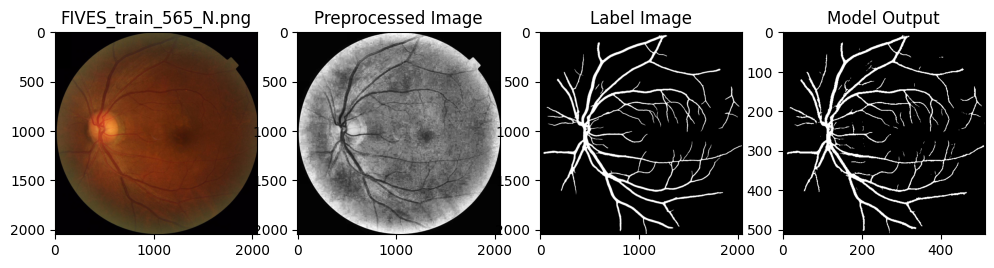

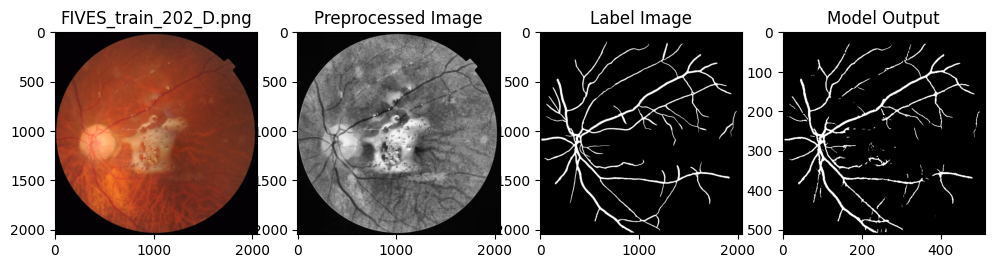

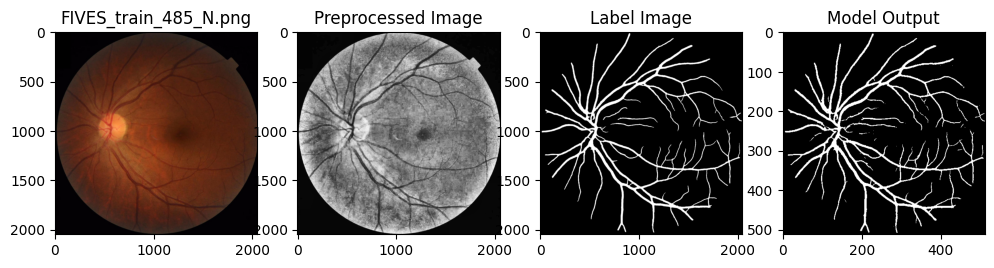

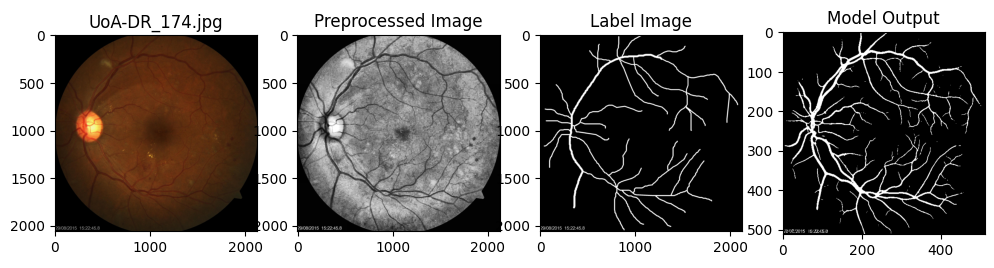

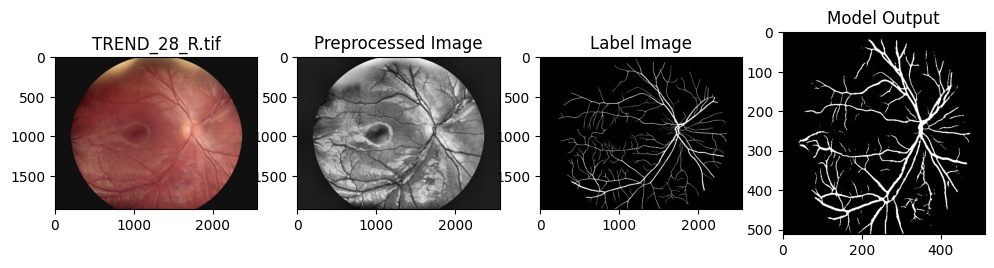

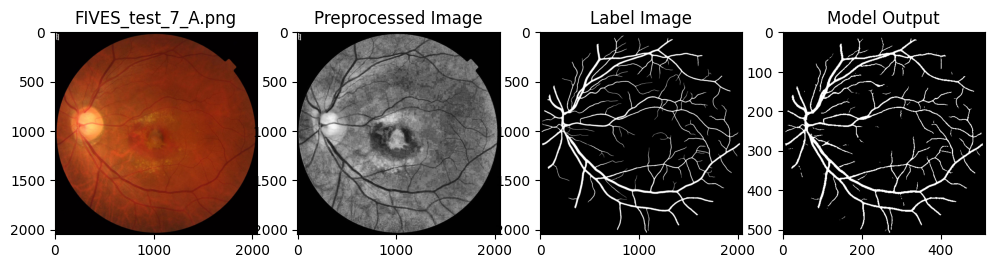

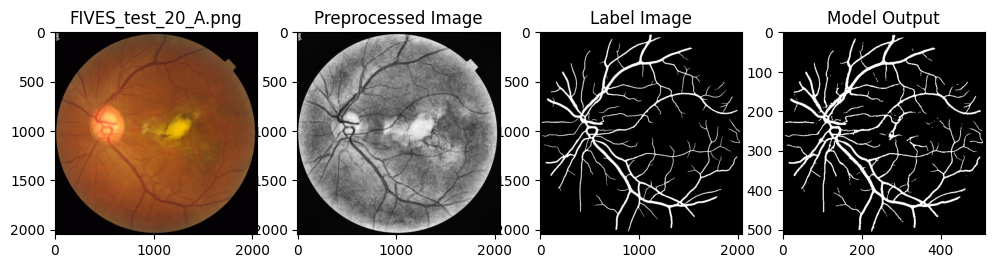

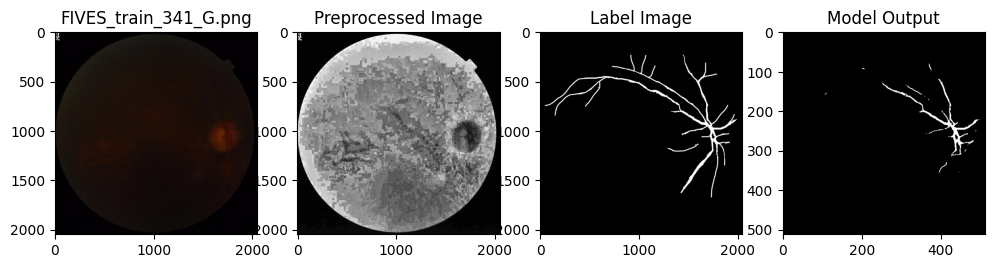

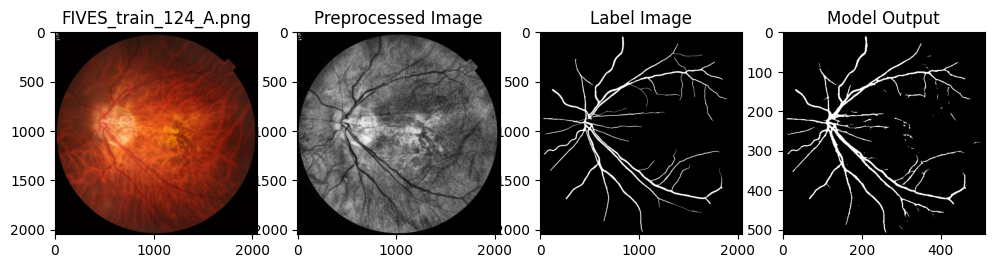

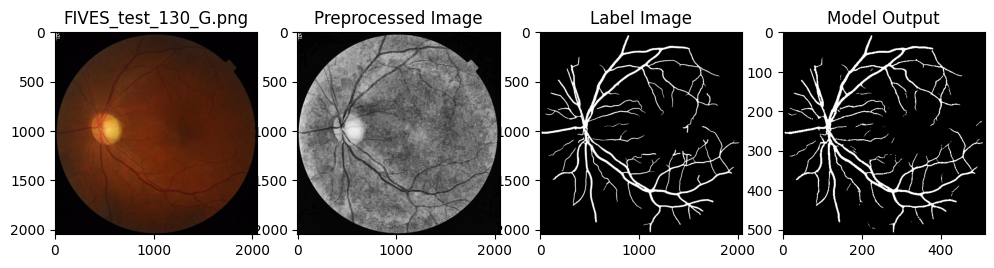

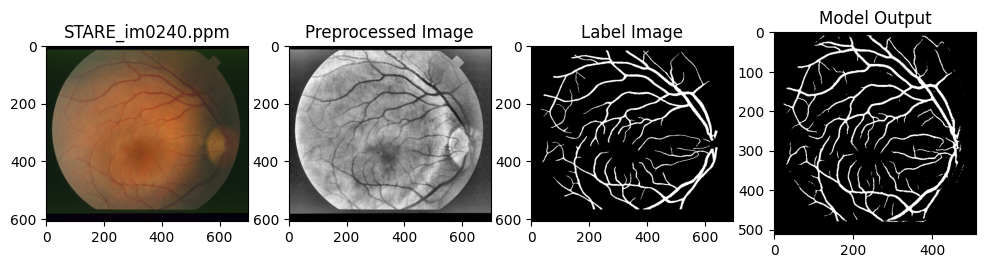

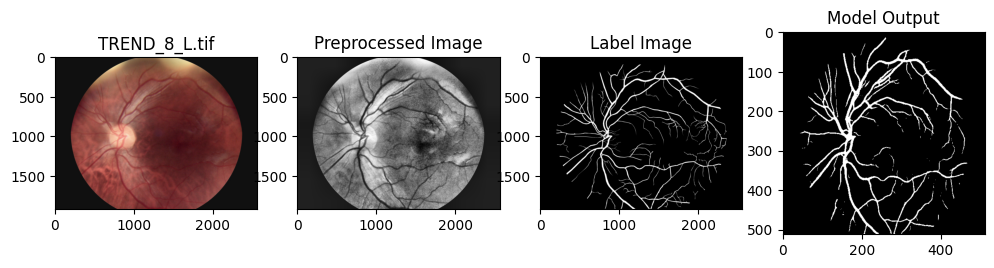

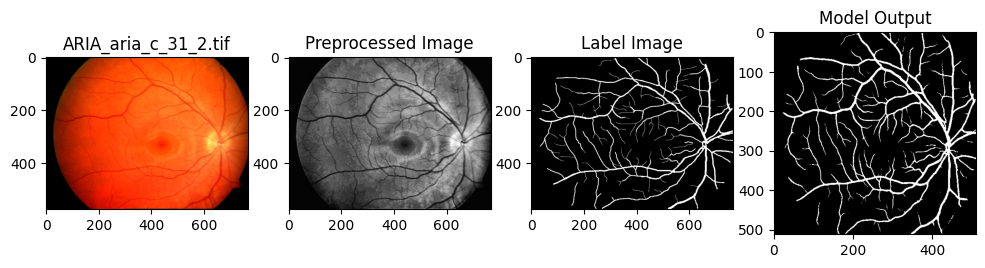

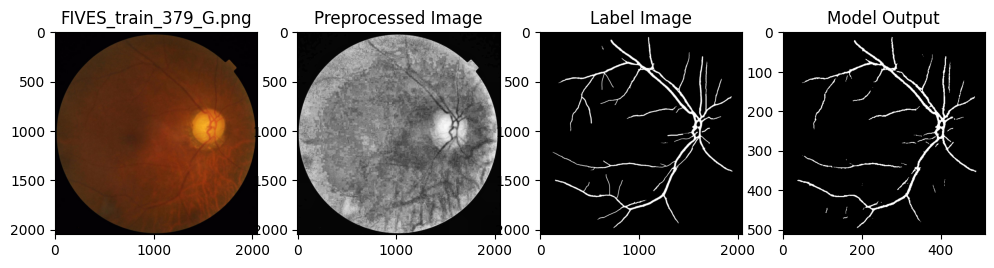

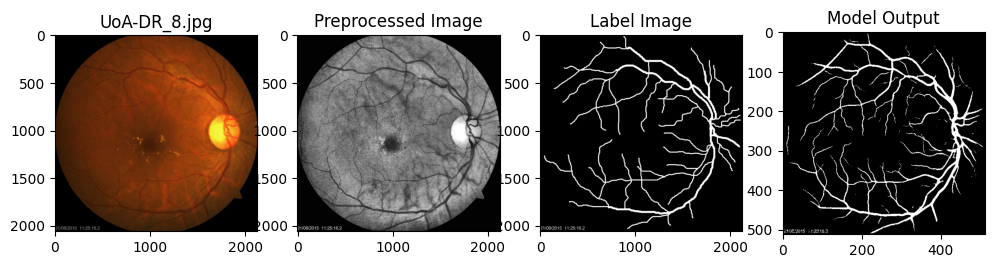

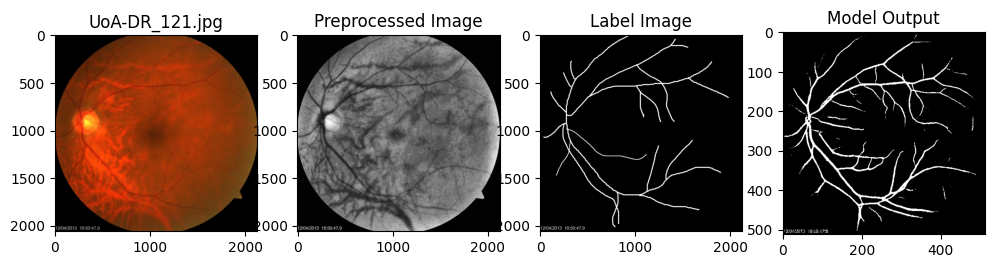

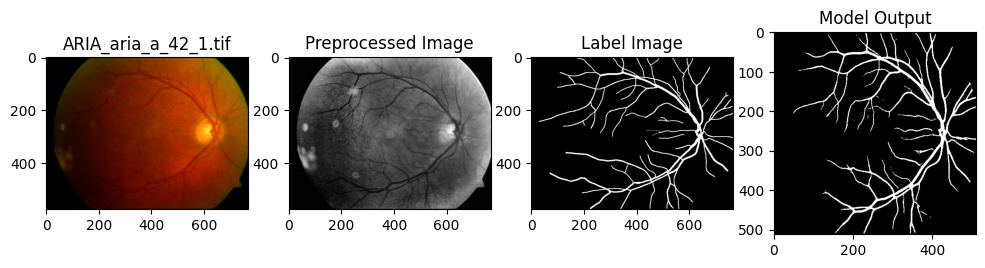

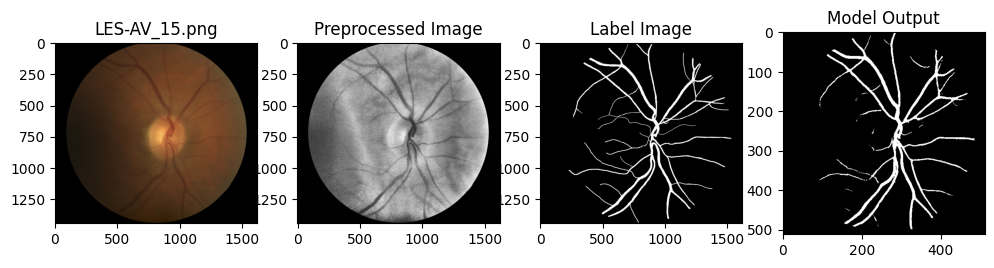

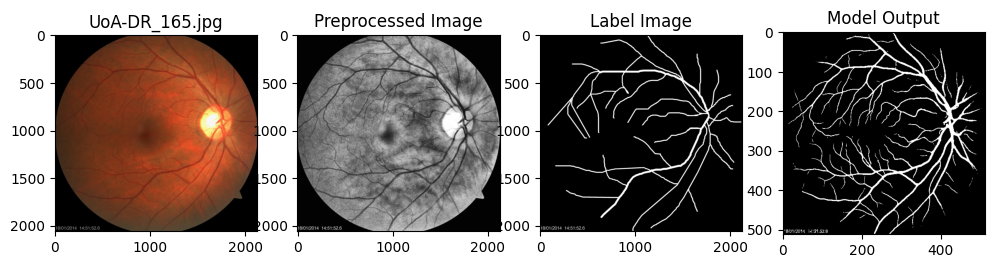

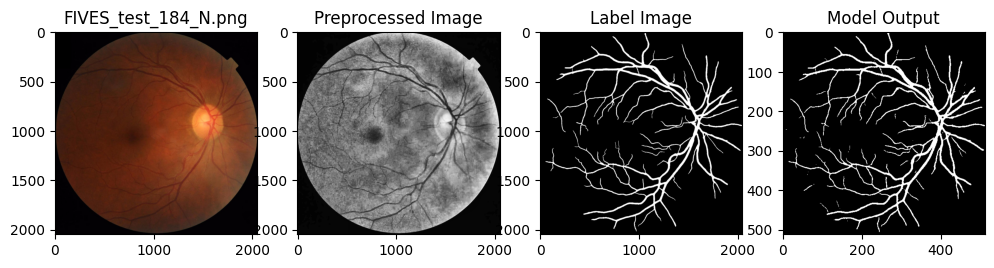

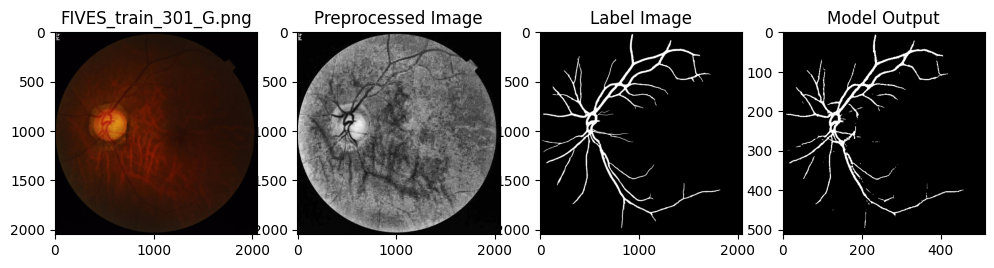

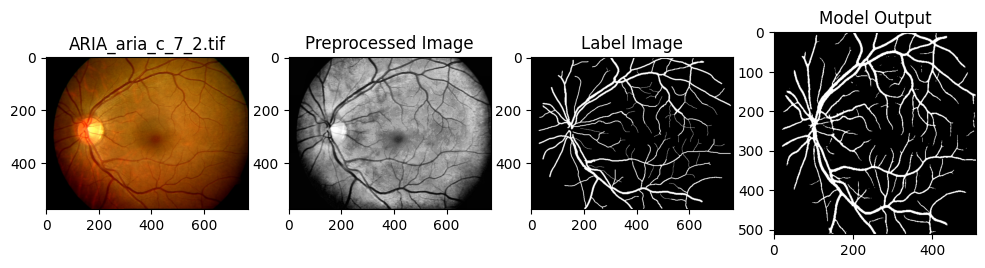

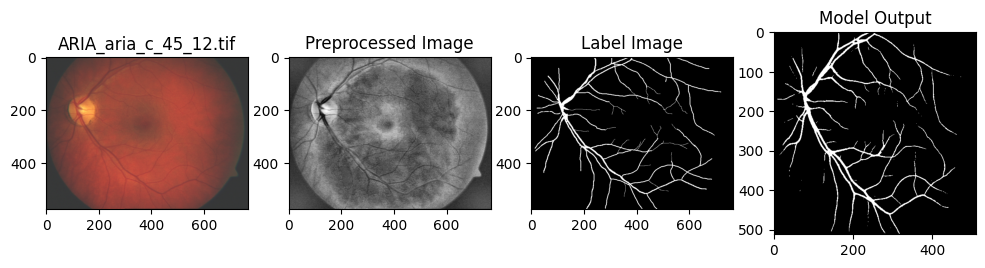

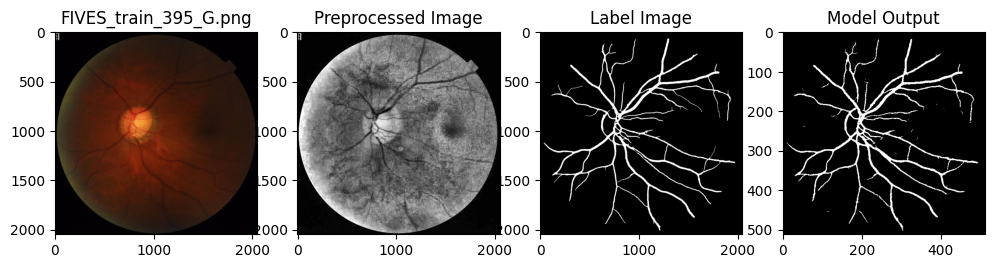

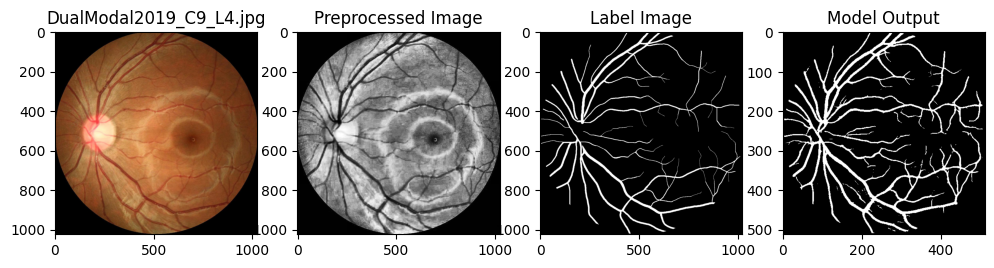

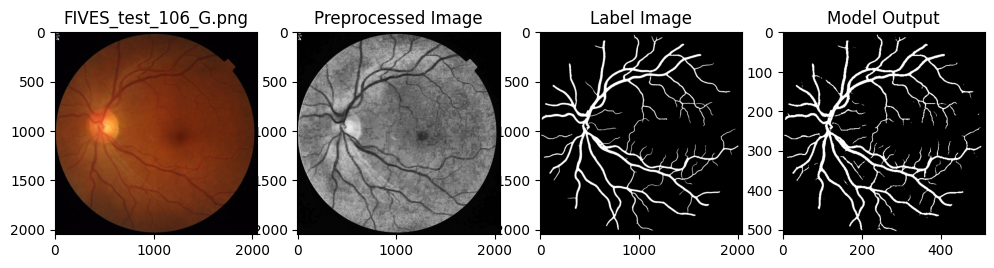

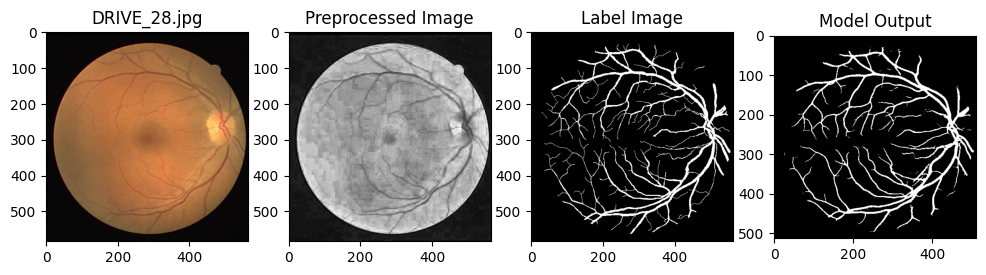

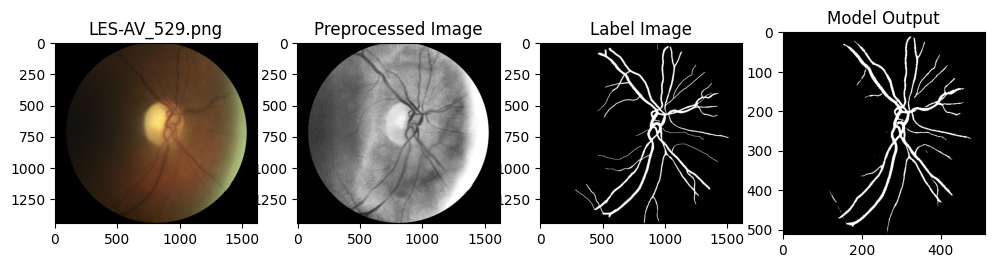

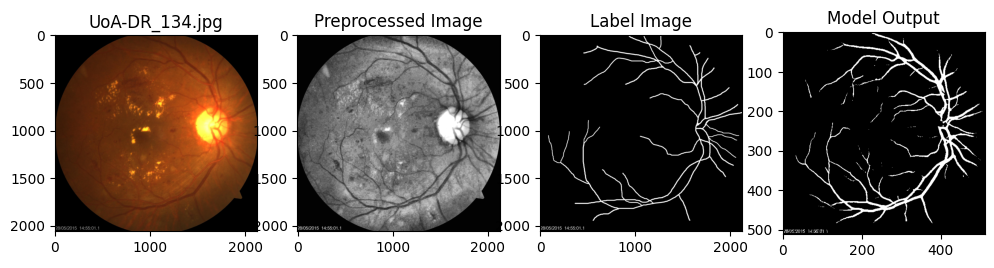

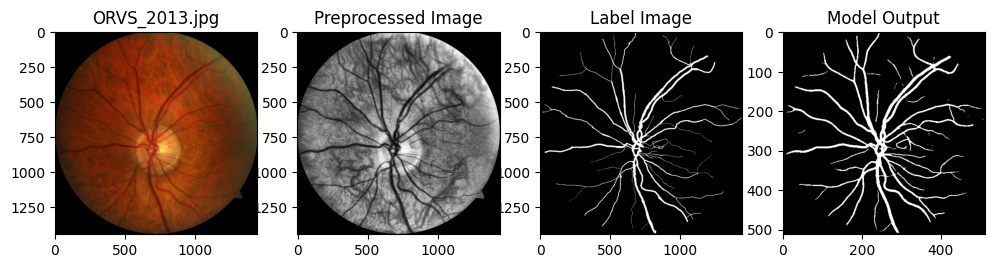

In [2]:
num_images_to_select = 30
input_path_list = []
label_path_list = []

file_list = random.sample(os.listdir(os.path.join(SOURCE, "Images")), num_images_to_select)
for file in file_list:
    for label_file in os.listdir(os.path.join(SOURCE, "Labels")):
        if label_file[:-3] == file[:-3]:
            input_path_list.append(os.path.join(SOURCE, "Images", file))
            label_path_list.append(os.path.join(SOURCE, "Labels", label_file))


# Plot model result
for i in range(0, num_images_to_select):
    check_result_full_size.visualize_result(model, test_preproc, input_path_list[i], label_path_list[i])